# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

## Get the Data

In [2]:
ds = pd.read_csv('data.csv')

ds.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Train Test Split

In [3]:
y = ds['diagnosis']
X = ds.drop('diagnosis', axis=1)

X = X.drop('id', axis=1)
i = len(X.columns)
X = X.drop(X.columns[i-1], axis=1)

y.replace(('M', 'B'), (1, 0), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=6)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [4]:
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train)  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## Predictions and Evaluations

Let's evaluate our KNN model!

In [5]:
pred = knn.predict(X_test)

In [6]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       107
           1       0.97      0.94      0.96        81

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188

[[105   2]
 [  5  76]]


## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [7]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

print(error_rate)

[0.06382978723404255, 0.05851063829787234, 0.03723404255319149, 0.05851063829787234, 0.05319148936170213, 0.05319148936170213, 0.047872340425531915, 0.05319148936170213, 0.0425531914893617, 0.05319148936170213, 0.047872340425531915, 0.05851063829787234, 0.05851063829787234, 0.05851063829787234, 0.05319148936170213, 0.06382978723404255, 0.05851063829787234, 0.06382978723404255, 0.05851063829787234, 0.06914893617021277, 0.06382978723404255, 0.06914893617021277, 0.06914893617021277, 0.06914893617021277, 0.06914893617021277, 0.06914893617021277, 0.06914893617021277, 0.06914893617021277, 0.06914893617021277, 0.06382978723404255, 0.06382978723404255, 0.06382978723404255, 0.06382978723404255, 0.07446808510638298, 0.07446808510638298, 0.07446808510638298, 0.06914893617021277, 0.07446808510638298, 0.06914893617021277]


Text(0, 0.5, 'Error Rate')

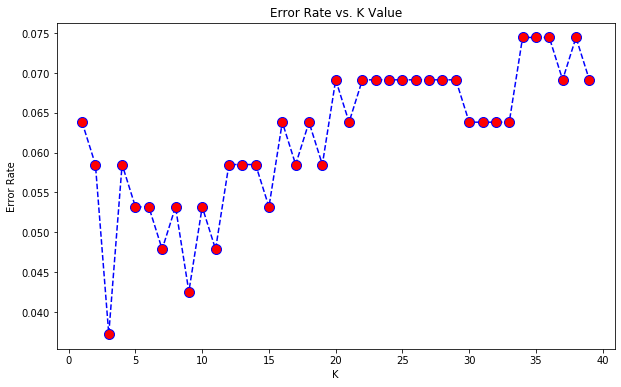

In [8]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [9]:
# NOW WITH K=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[105   2]
 [  5  76]]


              precision    recall  f1-score   support

           0       0.95      0.98      0.97       107
           1       0.97      0.94      0.96        81

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



# Great job!

We were able to squeeze some more performance out of our model by tuning to a better K value!